<a href="https://colab.research.google.com/github/ritwiks9635/Object_Recognition_And_Detection-/blob/main/Face_Landmark_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Face Landmark Detection With TensorFlow**

In [ ]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

In [ ]:
!wget https://github.com/shubham0204/Dataset_Archives/blob/master/face_landmarks_cleaned.zip?raw=true -O data.zip
!unzip data.zip

--2024-06-29 15:27:22--  https://github.com/shubham0204/Dataset_Archives/blob/master/face_landmarks_cleaned.zip?raw=true
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/shubham0204/Dataset_Archives/raw/master/face_landmarks_cleaned.zip [following]
--2024-06-29 15:27:22--  https://github.com/shubham0204/Dataset_Archives/raw/master/face_landmarks_cleaned.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/shubham0204/Dataset_Archives/master/face_landmarks_cleaned.zip [following]
--2024-06-29 15:27:22--  https://raw.githubusercontent.com/shubham0204/Dataset_Archives/master/face_landmarks_cleaned.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubuserco

In [ ]:
x_train = np.load("/content/face_landmarks_cleaned/x_train.npy") / 255
y_train = np.load("/content/face_landmarks_cleaned/y_train.npy") / 96
x_test = np.load("/content/face_landmarks_cleaned/x_test.npy") / 255
y_test = np.load("/content/face_landmarks_cleaned/y_test.npy") / 96

y_train = np.reshape(y_train, (-1, 1, 1, 30))
y_test = np.reshape(y_test, (-1, 1, 1, 30))

y_train.shape

(1498, 1, 1, 30)

In [ ]:
model_layers = [
    layers.SeparableConv2D(128 , input_shape=(96 , 96 , 1) , kernel_size=(5 , 5) , strides=1),
    layers.BatchNormalization(),
    layers.Activation('relu') ,
    layers.SeparableConv2D(128 , kernel_size=(5 , 5) , strides=1),
    layers.BatchNormalization(),
    layers.Activation('relu') ,

    layers.SeparableConv2D(128 , kernel_size=(5 , 5) , strides=1 , activation='relu'),
    layers.SeparableConv2D(128 , kernel_size=(5 , 5) , strides=1 , activation='relu'),

    layers.SeparableConv2D(128 , kernel_size=(5 , 5) , strides=1),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.SeparableConv2D(128 , kernel_size=(5 , 5) , strides=1),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.SeparableConv2D(128 , kernel_size=(5 , 5) , strides=1 , activation='relu'),
    layers.SeparableConv2D(128 , kernel_size=(5 , 5) , strides=1 , activation='relu'),

    layers.SeparableConv2D(128 , kernel_size=(5 , 5) , strides=1),
    layers.BatchNormalization(),
    layers.Activation('relu') ,
    layers.SeparableConv2D(128 , kernel_size=(5 , 5) , strides=1),
    layers.BatchNormalization(),
    layers.Activation('relu') ,

    layers.SeparableConv2D(64 , kernel_size=(5 , 5) , strides=1 , activation='relu'),
    layers.SeparableConv2D(64 , kernel_size=(5 , 5) , strides=1 , activation='relu'),

    layers.SeparableConv2D(64 , kernel_size=(5 , 5) , strides=1),
    layers.BatchNormalization(),
    layers.Activation('relu') ,
    layers.SeparableConv2D(64 , kernel_size=(5 , 5) , strides=1),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.SeparableConv2D(64 , kernel_size=(3 , 3) , strides=1 , activation='relu'),
    layers.SeparableConv2D(64 , kernel_size=(3 , 3) , strides=1 , activation='relu'),

    layers.SeparableConv2D(64 , kernel_size=(3 , 3) , strides=1 , activation='relu'),
    layers.SeparableConv2D(64 , kernel_size=(3 , 3) , strides=1 , activation='relu'),

    layers.SeparableConv2D(64 , kernel_size=(3 , 3) , strides=1 , activation='relu'),
    layers.SeparableConv2D(64 , kernel_size=(3 , 3) , strides=1 , activation='relu'),

    layers.SeparableConv2D(32 , kernel_size=(3 , 3) , strides=1 , activation='relu'),
    layers.SeparableConv2D(32 , kernel_size=(3 , 3) , strides=1 , activation='relu'),

    layers.SeparableConv2D(32 , kernel_size=(3 , 3) , strides=1 , activation='relu'),
    layers.SeparableConv2D(32 , kernel_size=(3 , 3) , strides=1 , activation='relu'),

    layers.SeparableConv2D(32 , kernel_size=(3 , 3) , strides=1 , activation='relu'),
    layers.SeparableConv2D(32 , kernel_size=(3 , 3) , strides=1 , activation='relu'),

    layers.SeparableConv2D(32 , kernel_size=(3 , 3) , strides=1 , activation='relu'),
    layers.SeparableConv2D(32 , kernel_size=(3 , 3) , strides=1 , activation='relu'),

    layers.SeparableConv2D(32 , kernel_size=(3 , 3) , strides=1 , activation='relu'),
    layers.SeparableConv2D(32 , kernel_size=(3 , 3) , strides=1 , activation='relu'),

    layers.SeparableConv2D(32 , kernel_size=(3 , 3) , strides=1 , activation='relu'),
    layers.SeparableConv2D(32 , kernel_size=(2 , 2) , strides=1 , activation='relu'),

    layers.SeparableConv2D(30 , kernel_size=(2 , 2) , strides=1 , activation='relu'),
    layers.SeparableConv2D(30 , kernel_size=(2 , 2) , strides=1 , activation='relu'),
    layers.SeparableConv2D(30 , kernel_size=(2 , 2) , strides=1 , activation='relu'),
    layers.SeparableConv2D(30 , kernel_size=(2 , 2) , strides=1 , activation='sigmoid'),
]
model = keras.Sequential(model_layers )
model.compile(loss = keras.losses.mean_squared_error , optimizer= keras.optimizers.Adam(lr=0.0001) , metrics=['mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 separable_conv2d (Separabl  (None, 92, 92, 128)       281       
 eConv2D)                                                        
                                                                 
 batch_normalization (Batch  (None, 92, 92, 128)       512       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 92, 92, 128)       0         
                                                                 
 separable_conv2d_1 (Separa  (None, 88, 88, 128)       19712     
 bleConv2D)                                                      
                                                                 
 batch_normalization_1 (Bat  (None, 88, 88, 128)       512       
 chNormalization)                                       

In [ ]:
model.fit(
    x_train, y_train,
    batch_size = 50,
    validation_data = (x_test, y_test),
    epochs = 25)

Epoch 1/25
30/30 [==============================] - 59s 931ms/step - loss: 0.0372 - mse: 0.0372 - val_loss: 0.0355 - val_mse: 0.0355
Epoch 2/25
30/30 [==============================] - 16s 521ms/step - loss: 0.0329 - mse: 0.0329 - val_loss: 0.0285 - val_mse: 0.0285
Epoch 3/25
30/30 [==============================] - 17s 557ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 4/25
30/30 [==============================] - 17s 562ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 5/25
30/30 [==============================] - 17s 565ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 6/25
30/30 [==============================] - 16s 538ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 7/25
30/30 [==============================] - 17s 573ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 8/25
30/30 [==============================] - 16s 544ms/step - 

1/1 [==============================] - 0s 20ms/step


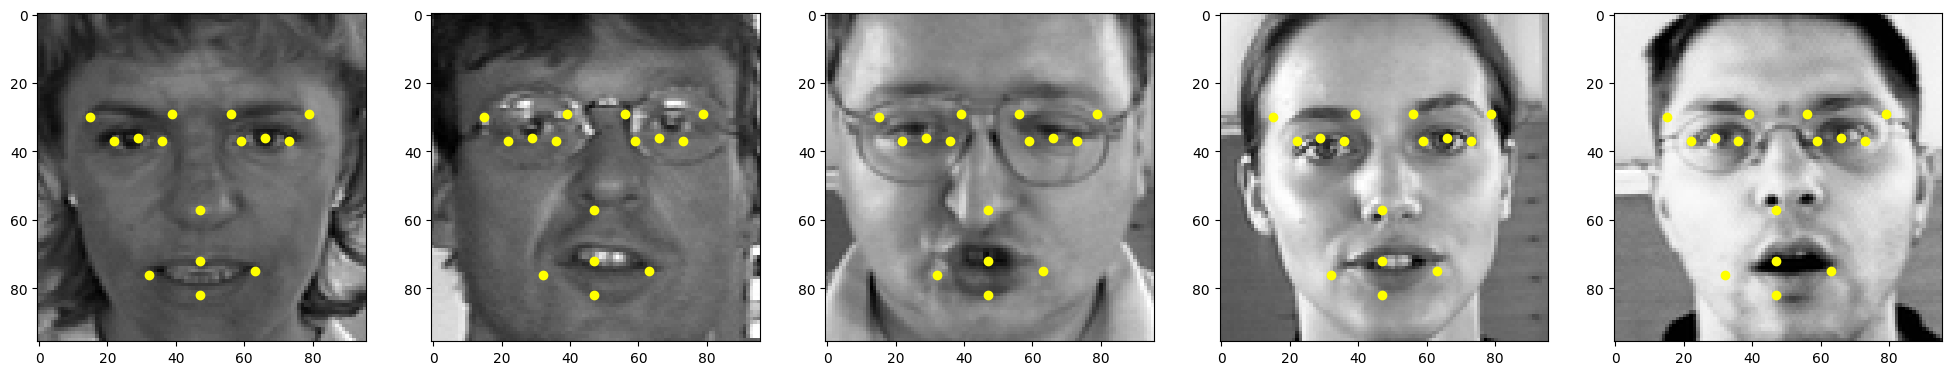

In [ ]:
plt.figure(figsize=(50, 50))
for i in range(1, 6):
    sample_img = np.reshape(x_test[i] * 255.0, (96, 96)).astype("uint8")
    pred = model.predict(x_test[i : i+1]) * 96
    pred = pred.astype(np.int32)
    pred = np.reshape(pred[0, 0, 0], (15, 2))

    plt.subplot(1, 10, i)
    plt.imshow(sample_img.T, cmap = "gray")
    plt.scatter(pred[:, 0], pred[:, 1], c = "yellow")
plt.show()

In [15]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


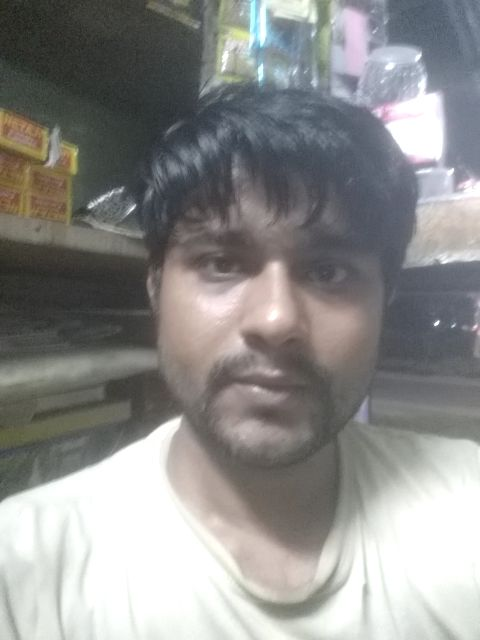

In [16]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

1/1 [==============================] - 0s 23ms/step


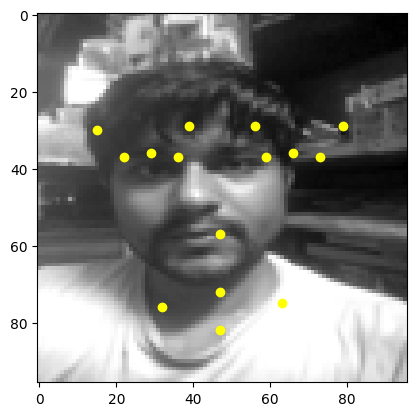

In [17]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open("photo.jpg").convert('L').resize((96 , 96)).rotate(90)
image_arr = np.asarray(image) / 255

pred = model.predict(np.array([image_arr.reshape(96 , 96 , 1 )])) * 96
pred = pred.astype(np.int32 )
pred = np.reshape(pred[0 , 0 , 0 ] , (15 , 2))

plt.imshow(image_arr.T , cmap='gray')
plt.scatter(pred[: , 0] , pred[: , 1] , c='yellow')
plt.show()

convert the Keras model to a TensorFlow Lite model.

```
converter = tf.lite.TFLiteConverter.from_keras_model( model )
converter.optimizations = [tf.lite.Optimize.DEFAULT]
x_test = x_test.astype( np.float32 )
ds = tf.data.Dataset.from_tensor_slices(( x_test )).batch(1)
def representative_data_gen():
  for input_value in ds.take(100):
    yield [input_value]
converter.representative_dataset = representative_data_gen
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.uint8

buffer = converter.convert()
open( 'model_sep.tflite' , 'wb' ).write( buffer )

interpreter = tf.lite.Interpreter(model_path="model.tflite")
interpreter.allocate_tensors()

# Print input shape and type
print(interpreter.get_input_details()[0]['shape'])
print(interpreter.get_input_details()[0]['dtype'])

# Print output shape and type
print(interpreter.get_output_details()[0]['shape'])
print(interpreter.get_output_details()[0]['dtype'])
```